In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
import numpy as np
import glob
import os

In [2]:
results_dir='/home/samuel/data/drift_tool_test/salish_test_201704905467/runs/salishseacast2017041100_P1D'
# Use glob to find all netcdf files in results_dir
files = glob.glob(os.path.join(results_dir, '*.nc'))

In [3]:
files


['/home/samuel/data/drift_tool_test/salish_test_201704905467/runs/salishseacast2017041100_P1D/ariane_trajectories_qualitative.nc']

In [6]:
file = files[0]
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:       (nb_output: 25, ntraj: 200)
Coordinates:
  * nb_output     (nb_output) datetime64[ns] 2017-04-11 2017-04-11T01:00:00 ...
  * ntraj         (ntraj) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Data variables:
    init_x        (ntraj) float64 84.78 96.13 107.5 119.7 131.1 142.2 154.2 ...
    init_y        (ntraj) float64 312.8 307.5 301.5 296.0 290.1 284.5 278.8 ...
    init_z        (ntraj) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    init_t        (ntraj) float64 24.5 24.5 24.5 24.5 24.5 24.5 24.5 24.5 ...
    init_age      (ntraj) timedelta64[ns] 00:00:00 00:00:00 00:00:00 ...
    init_transp   (ntraj) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    final_x       (ntraj) float64 90.66 138.4 155.6 165.5 126.0 130.5 155.4 ...
    final_y       (ntraj) float64 333.4 279.2 286.5 287.0 312.6 306.4 286.4 ...
    final_z       (ntraj) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    final_t       (ntraj) float64 48.5 48.5

In [105]:
def plot_file(fname):
    """Plot the modelled and observed trajector in a file fname"""
    ds = xr.open_dataset(fname)
    fig, ax = plt.subplots(1,1,figsize=(20,15))
    basemap_plot=Basemap(projection='merc', resolution='h', llcrnrlon=-125, 
                             llcrnrlat=48, urcrnrlon=-122, urcrnrlat=50)
    
    #ax.plot(ds.traj_lon.values, ds.traj_lat.values, c='k', label='observations')
    #ax.plot(ds.traj_lon.values[0], ds.traj_lat.values[0], 'go')
    #ax.plot(ds.traj_lon.values[-1], ds.traj_lat.values[-1], 'ro')
    obs_value_x, obs_value_y = basemap_plot(ds.traj_lon.values, ds.traj_lat.values) 
    basemap_plot.plot(obs_value_x, obs_value_y, c = 'k', label = 'observed')
    basemap_plot.plot(obs_value_x[0], obs_value_y[0], 'go')
    basemap_plot.plot(obs_value_x[-1], obs_value_y[-1], 'ro')
    basemap_plot.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
        # draw coastlines, country boundaries, fill continents.
    basemap_plot.fillcontinents(color='lightgrey', alpha=0.7, lake_color='grey')
    basemap_plot.drawcoastlines(linewidth=0.8, color="black")
    

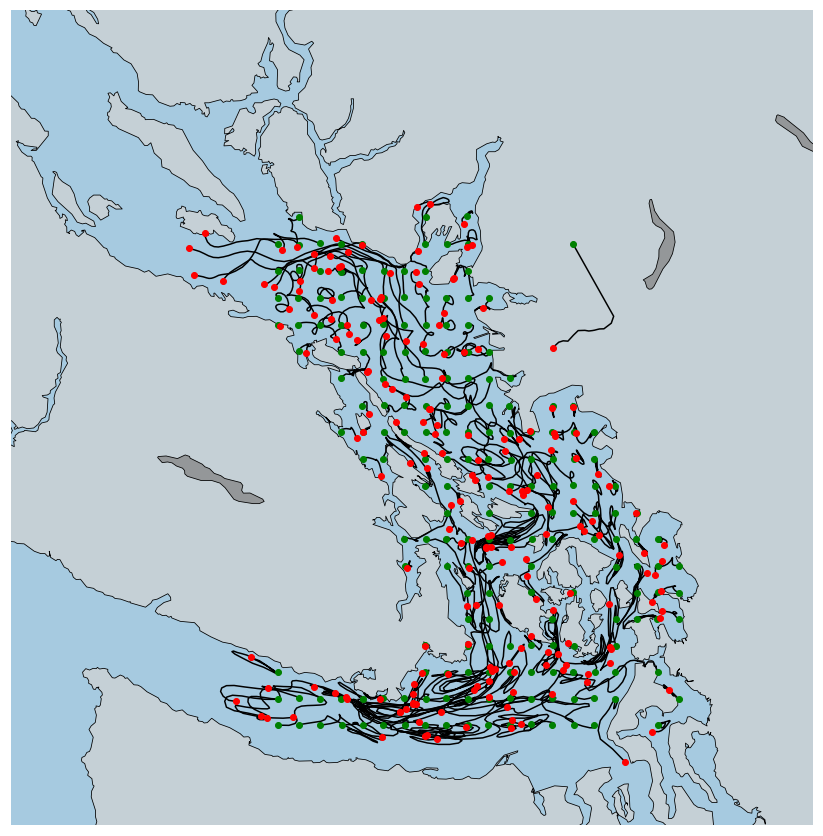

In [106]:
for file in files: 

    plot_file(file)